In [ ]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import seaborn as sns

from numpy import concatenate
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from tensorflow.python.keras.layers import Dense, LSTM , Dropout
from tensorflow.python.keras import Sequential
from math import sqrt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Python/PM2-5/PRSA_data_2010.1.1-2014.12.31.csv')
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


## 1 Delete the days when pm2.5==NaN

In [ ]:
df['Date'] = pd.to_datetime(df[['year','month','day']])
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Date
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01


In [ ]:
# df.isnull().sum()

In [ ]:
date_nan = df.loc[df['pm2.5'].isnull(), ['year','month','day']].drop_duplicates()
date_nan['Date'] = pd.to_datetime(date_nan[['year','month','day']])
date_nan

,year,month,day,Date
0,2010,1,1,2010-01-01
545,2010,1,23,2010-01-23
552,2010,1,24,2010-01-24
576,2010,1,25,2010-01-25
600,2010,1,26,2010-01-26
...,...,...,...,...
42840,2014,11,21,2014-11-21
43190,2014,12,5,2014-12-05
43264,2014,12,8,2014-12-08
43273,2014,12,9,2014-12-09


In [ ]:
# dfa = df.loc[~(df['year']== 2010),:]
# dfa

In [ ]:
df1 = df.loc[~(df['Date'].isin(date_nan['Date'])),:]
df1

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Date
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,2014-12-31


In [ ]:
df1['date'] = pd.to_datetime(df1[['year','month','day','hour']])
df2 = df1.drop(columns=['No','year','month','day','hour', 'Date'])
df2
# df2.set_index('Date', inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date
24,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00
...,...,...,...,...,...,...,...,...,...
43819,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31 19:00:00
43820,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31 20:00:00
43821,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31 21:00:00
43822,8.0,-22,-4.0,1034.0,NW,246.72,0,0,2014-12-31 22:00:00


## 2 OR: just delete the rows with NaN values

In [ ]:
df1 = df.dropna()
df1['Date'] = pd.to_datetime(df1[['year','month','day','hour']])
df2 = df1.drop(columns = ['No','year','month','day','hour'])
df2.set_index('Date', inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 3 Data Visualization

In [ ]:
df2['cbwd'].unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [ ]:
# df['BrandName'].replace(['ABC', 'AB'], 'A')

In [ ]:
df2['cbwd'] = df2['cbwd'].replace('cv','SW')  # assign the new column to the original one
# df2.replace({'cbwd': {'cv':'SW'}})
df2['cbwd'].unique() # check to make sure all 'cv' have been replaced.

array(['SE', 'SW', 'NW', 'NE'], dtype=object)

In [ ]:
df2.groupby(['Iws','cbwd'])['pm2.5'].mean()

Iws     cbwd
0.45    SW      149.018519
0.89    NE      161.288172
        NW      162.045894
        SE      150.214388
        SW      125.092668
                   ...    
534.65  NW       27.000000
543.59  NW       17.000000
552.53  NW       19.000000
559.68  NW       16.000000
565.49  NW       22.000000
Name: pm2.5, Length: 3815, dtype: float64

In [ ]:
df2['Iws'].describe()

count    41757.000000
mean        23.866747
std         49.617495
min          0.450000
25%          1.790000
50%          5.370000
75%         21.910000
max        565.490000
Name: Iws, dtype: float64

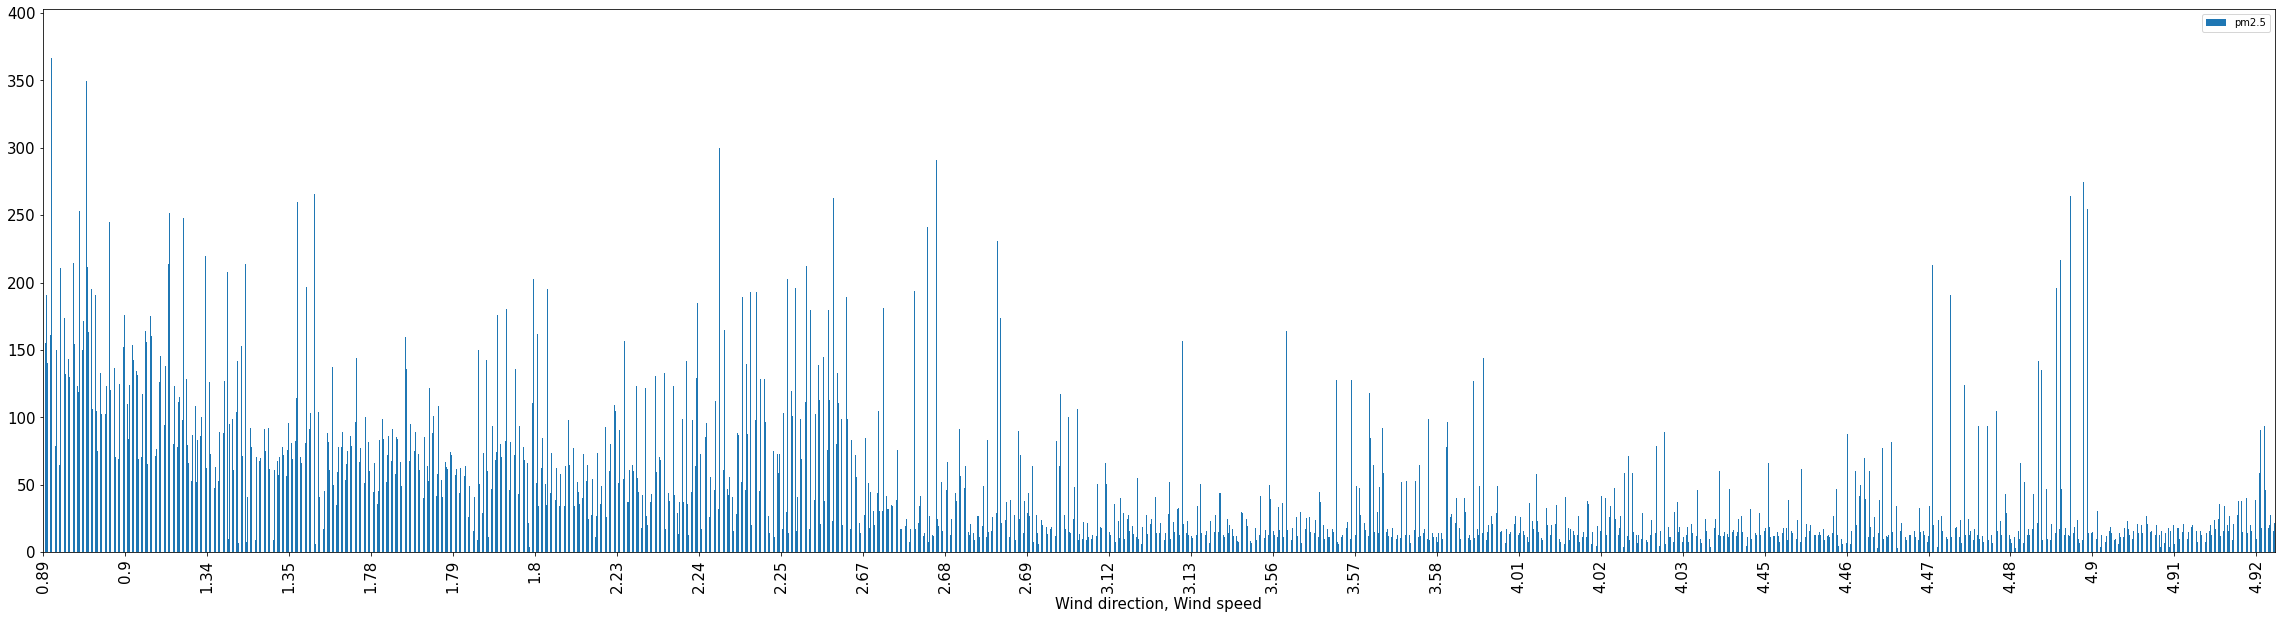

In [ ]:
import matplotlib.ticker as ticker
# plot data
fig, ax = plt.subplots(figsize=(40,10))
# use unstack()
df2.groupby(['Iws'])['pm2.5'].mean().plot.bar(ax=ax, legend=True)  #,'cbwd'
# df2.groupby('Is')['pm2.5'].plot(ax=ax, legend=True)
tick_spacing = 100
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlabel('Wind direction, Wind speed', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

# 链接：https://www.zhihu.com/question/298223938/answer/510362104

In [ ]:
df2['Is'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 14, 18])

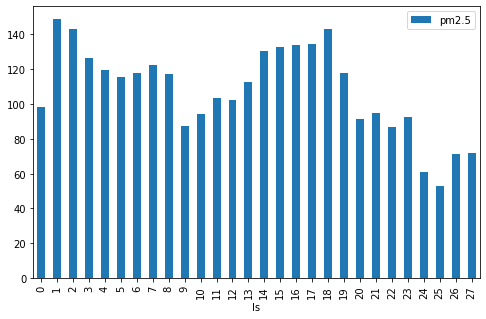

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
df2.groupby('Is')['pm2.5'].mean().plot.bar(ax=ax, legend=True)

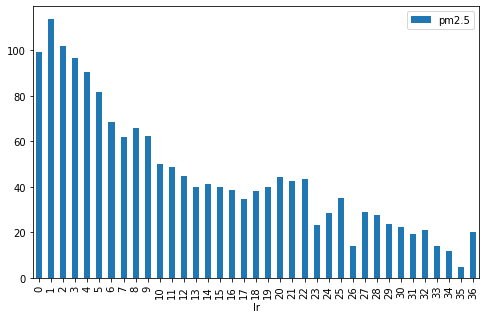

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
df2.groupby('Ir')['pm2.5'].mean().plot.bar(ax=ax, legend=True)

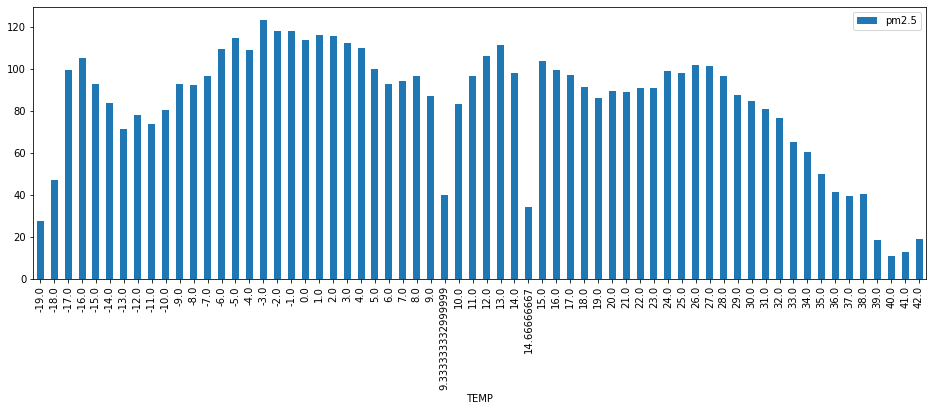

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))
df2.groupby('TEMP')['pm2.5'].mean().plot.bar(ax=ax, legend=True)

In [ ]:
colors = {'NE': 'skyblue', 'NW': 'b', 'SE': 'g','SW': 'gray'}
[colors[i] for i in ['NE','NW']]

['skyblue', 'b']

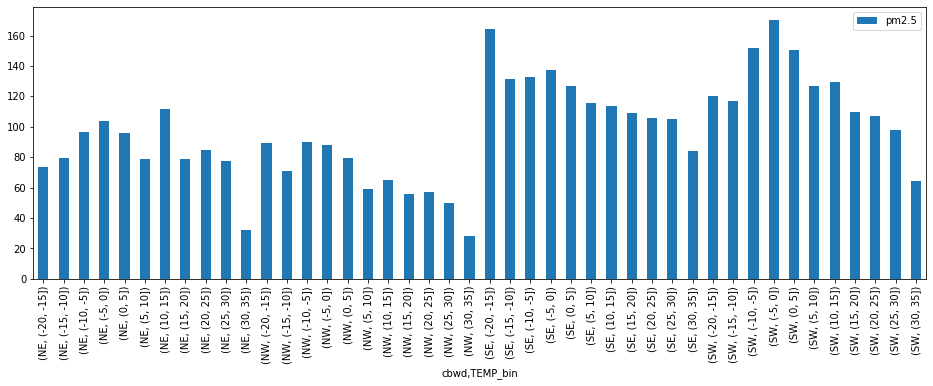

In [ ]:
# df2['bin'] = pd.cut(df2['TEMP'], [-20, -10, 0, 10, 20, 30, 40],
#                     labels= ['-20~-10','-10~0','0~10','10~20','20-30','30~40'])
df2['TEMP_bin'] = pd.cut(df2['TEMP'], np.arange(-20,40,5))
fig, ax = plt.subplots(figsize=(16,5))
# colors = {'NE': 'b', 
#           'NW': 'g', 
#           'SE': 'r',
#           'SW': 'c'}
df2.groupby(['cbwd', 'TEMP_bin'])['pm2.5'].mean().plot.bar(ax=ax, legend=True)
                                                      # , color = [colors[i] for i in df2['cbwd']])
                                                        

In [ ]:
df2['pm2.5_bin'] = pd.cut(df2['pm2.5'], [-1,35,75,115,150,250,max(df2['pm2.5'])],
                          labels = ['excellent air', 'good air','slight polution','medium polution','serious polution','extreme polution'])
df2

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5_bin,year
Date,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0,medium polution,2010
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0,medium polution,2010
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0,serious polution,2010
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0,serious polution,2010
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0,medium polution,2010
...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0,excellent air,2014
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0,excellent air,2014
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0,excellent air,2014


In [ ]:
df2['year']=df2.index.year
df2

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5_bin,year
Date,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0,medium polution,2010
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0,medium polution,2010
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0,serious polution,2010
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0,serious polution,2010
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0,medium polution,2010
...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0,excellent air,2014
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0,excellent air,2014
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0,excellent air,2014


In [ ]:
pm25_bins = df2['pm2.5_bin'].drop_duplicates()
pm25_bins.reset_index(drop=True, inplace=True)
pm25_bins

0     medium polution
1    serious polution
2     slight polution
3            good air
4       excellent air
5    extreme polution
Name: pm2.5_bin, dtype: category
Categories (6, object): [excellent air < good air < slight polution < medium polution <
                         serious polution < extreme polution]

In [ ]:
# df2[df2['pm2.5_bin'].isnull()]

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5_bin,year
Date,,,,,,,,,,


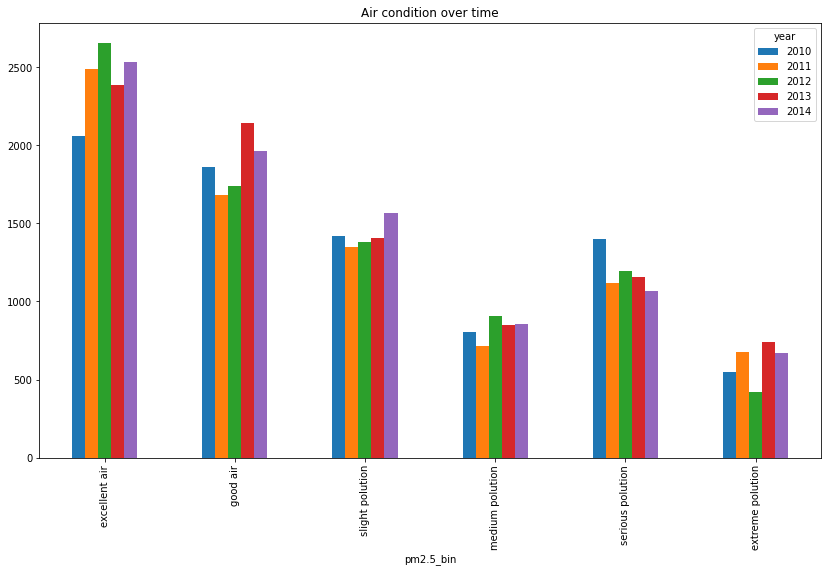

In [ ]:
df2.groupby(['year','pm2.5_bin'])['pm2.5_bin'].count().unstack(0).plot.bar(title="Air condition over time", figsize=(14,8))

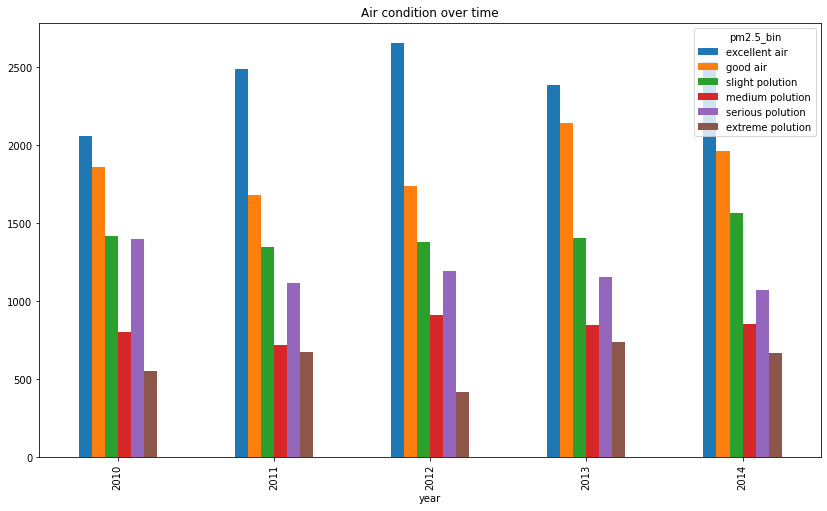

In [ ]:
df2.groupby(['year','pm2.5_bin'])['pm2.5_bin'].count().unstack(1).plot.bar(title="Air condition over time", figsize=(14,8))

In [ ]:
df3 = df2.drop(columns=['bin'])
df3.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
Date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


## 4 One-hot Encoding

In [ ]:
df4 = pd.get_dummies(df3)
df4.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW
Date,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


## 5 Create models

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]     # there are 7(here data.shape[1]=7) variables recorded at each time.
	dff = pd.DataFrame(data)   #2075259 rows × 7 columns, while the col names are [0,1,2,3,4,5,6]. Column 0 is the target we want to predict.
	cols, names = list(), list()   
	# 输入序列(t-n, ... t-1)
	for i in range(n_in, 0, -1): 
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# 预测序列 (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# 组合起来
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# 丢掉NaN
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
# 把所有特征进行规范化
from sklearn.preprocessing import MinMaxScaler
# # 将数据按小时聚合
values = df4.values 
# 特征归一化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# 转化为监督问题
reframed = series_to_supervised(scaled, 1, 1)
# 删除不需要的特征
reframed.drop(reframed.columns[-10:], axis=1, inplace=True)  # delete the non-target, the var1 is the target(pm2.5).
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  ...  var10(t-1)  var11(t-1)   var1(t)
1   0.129779   0.352941   0.245902  ...         1.0         0.0  0.148893
2   0.148893   0.367647   0.245902  ...         1.0         0.0  0.159960
3   0.159960   0.426471   0.229508  ...         1.0         0.0  0.182093
4   0.182093   0.485294   0.229508  ...         1.0         0.0  0.138833
5   0.138833   0.485294   0.229508  ...         1.0         0.0  0.109658

[5 rows x 12 columns]


In [ ]:
# Split to train & test
# We will only fit the model on the first 2 years(365 24 2 hours) of data, 
# then evaluate it on the remaining 3 years of data.
values = reframed.values
n_train_time = 365*24*2
train = values[:n_train_time, :]   # return the first n rows with all columns
test = values[n_train_time:, :]
train_X, train_y = train[:, :-1], train[:, -1]   # all the features except the last column
test_X, test_y = test[:, :-1], test[:, -1]
# 把数据转换为3维, reshape input to 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(17520, 1, 11) (17520,) (24236, 1, 11) (24236,)


Using TensorFlow backend.


Train on 17520 samples, validate on 24236 samples
Epoch 1/20
 - 4s - loss: 0.0057 - val_loss: 0.0101
Epoch 2/20
 - 2s - loss: 0.0020 - val_loss: 0.0090
Epoch 3/20
 - 2s - loss: 0.0013 - val_loss: 0.0057
Epoch 4/20
 - 2s - loss: 0.0011 - val_loss: 0.0036
Epoch 5/20
 - 2s - loss: 9.5991e-04 - val_loss: 0.0027
Epoch 6/20
 - 2s - loss: 9.0473e-04 - val_loss: 0.0018
Epoch 7/20
 - 3s - loss: 8.6148e-04 - val_loss: 0.0014
Epoch 8/20
 - 2s - loss: 8.3718e-04 - val_loss: 0.0012
Epoch 9/20
 - 2s - loss: 8.0699e-04 - val_loss: 9.3971e-04
Epoch 10/20
 - 3s - loss: 7.9273e-04 - val_loss: 8.9988e-04
Epoch 11/20
 - 2s - loss: 7.9105e-04 - val_loss: 8.3771e-04
Epoch 12/20
 - 2s - loss: 7.7286e-04 - val_loss: 7.9174e-04
Epoch 13/20
 - 2s - loss: 7.7736e-04 - val_loss: 7.3257e-04
Epoch 14/20
 - 2s - loss: 7.5781e-04 - val_loss: 7.2235e-04
Epoch 15/20
 - 2s - loss: 7.5530e-04 - val_loss: 6.8123e-04
Epoch 16/20
 - 3s - loss: 7.5947e-04 - val_loss: 6.9385e-04
Epoch 17/20
 - 2s - loss: 7.5134e-04 - val_loss

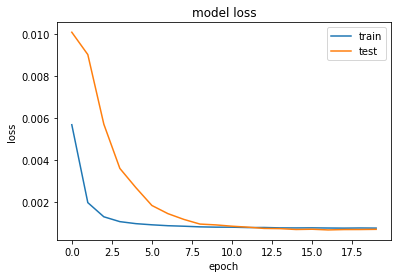

In [ ]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential


# 搭建网络模型
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# 训练网络
history = model.fit(train_X, train_y, 
                    epochs=20, batch_size=72, 
                    validation_data=(test_X, test_y), 
                    verbose=2, shuffle=False)
# 统计 loss 值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
# Make predictions
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [ ]:
# from sklearn.metrics import mean_squared_error

# invert scaling for forecast 对预测值进行反演缩放
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)   # 数据格式要和原来归一化之前的shape必须一样；如果不一样可以用concatenate合并数据
inv_yhat = scaler.inverse_transform(inv_yhat)    #scaler.inverse_transform(X_scaled) 是将 标准化后的数据 转换为 原始数据
inv_yhat = inv_yhat[:,0]

# invert scaling for actual 对真实值进行反演缩放
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE and MAE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
mae = (mean_absolute_error(inv_y, inv_yhat))
print('Test MAE: %.3f' % mae)

Test RMSE: 26.091
Test MAE: 17.621


Notes:
https://api.rpubs.com/zxiao/458697



*   可以看出pm2.5浓度的季节性变化非常明显。通常来说冬季pm2.5浓度最高，夏季pm2.5浓度最低。这也符合常识，
  - 冬季pm2.5浓度高的原因主要在于燃煤供暖，生物质燃烧和不利于空气扩散的气候；
  - 夏季pm2.5浓度明显降低，这主要与人为排放和以供暖为目的的生物质的燃烧减少有关，当然海洋季风气候带来的洁净空气也对空气污染起着较强的稀释作用。


*   同时我们将pm2.5值按年度做箱线图看整体分布情况，可以看到近几年pm2.5浓度值稍有下降，箱线图上各分位数的值都是有所降低的，也均存在异常值，并且异常值的大小和数量并未有明显减少。为了更明显发现统计规律，根据2016年1月1日实施的国家标准GB3095-2012《环境空气质量标准》中对PM2.5等级的划分，我们可以对数据做以下划分：



Notes: 
https://api.rpubs.com/zxiao/458697
